In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salaries-2023/ds_salaries.csv


In [2]:
df=pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
company_size_count=df['company_size'].value_counts()
df['company_size']=df['company_size'].replace('L',"Large")
df['company_size']=df['company_size'].replace('M',"Medium")
df['company_size']=df['company_size'].replace('S',"Small")
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,Small
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,Small
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,Medium
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,Medium


In [7]:
'''
This is a pie chart for the company size
'''


'\nThis is a pie chart for the company size\n'

In [8]:
df["high_salaries"]=df['salary_in_usd']>100000
df['high_salaries'].value_counts()


high_salaries
True     2665
False    1090
Name: count, dtype: int64

In [9]:
job_title_counts=df['job_title'].value_counts()
filt_job_title=job_title_counts[job_title_counts>=100].index
filtered_df=df[df['job_title'].isin(filt_job_title)]
pie_filt=filtered_df['job_title'].value_counts()
filtered_df.job_title.value_counts()
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,high_salaries
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large,False
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,Small,False
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,Small,False
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,Medium,True
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,Medium,True
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,Large,True
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,Large,True
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,Medium,True
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,Medium,True
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,Medium,True


In [10]:
'''
Salary increment in years by job title
'''

'\nSalary increment in years by job title\n'

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

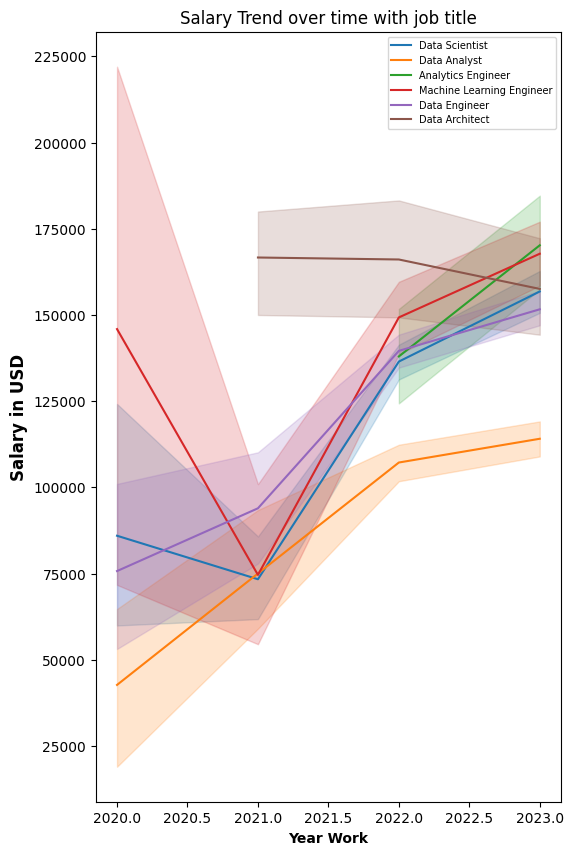

In [11]:
plt.figure(figsize=(6,10))
si=sns.lineplot(data=filtered_df,x='work_year',y='salary_in_usd',hue='job_title',markersize=0,marker='D')
plt.xlabel('Year Work',fontsize=10,fontweight='bold')
plt.ylabel('Salary in USD',fontsize=12,fontweight='bold')
si.set_facecolor('white')
plt.grid(False)
plt.title("Salary Trend over time with job title")
plt.legend(loc='upper right',fontsize=7)
plt.show()


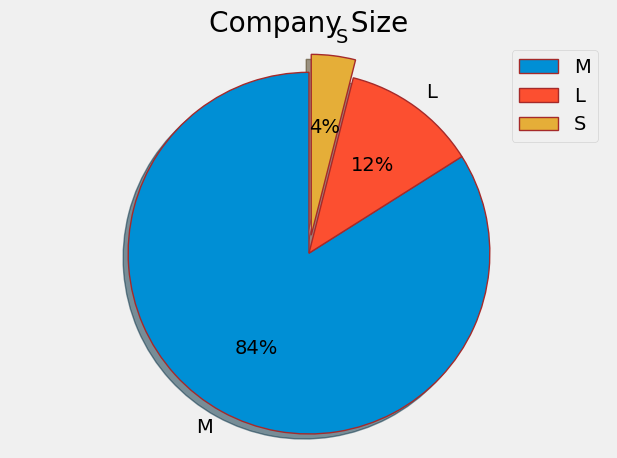

In [12]:
plt.style.use('fivethirtyeight')
labels=company_size_count.index
sizes=company_size_count.values

explode=[0,0,0.1]
plt.pie(sizes, labels=labels,explode=explode,startangle=90,autopct='%.0f%%',shadow=True,wedgeprops={'edgecolor':'brown','linewidth':1,'linestyle':'solid'})
plt.title("Company Size")
plt.legend(loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [13]:
'''
Data Science Salary Trends in 2023
'''

df.experience_level.value_counts()
df['experience_level']=df['experience_level'].replace('SE','Senior')
df['experience_level']=df['experience_level'].replace('MI','Mid Level')
df['experience_level']=df['experience_level'].replace('EX','Expert')
df['experience_level']=df['experience_level'].replace('EN','Entry Level')
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,high_salaries
0,2023,Senior,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large,False
1,2023,Mid Level,CT,ML Engineer,30000,USD,30000,US,100,US,Small,False
2,2023,Mid Level,CT,ML Engineer,25500,USD,25500,US,100,US,Small,False


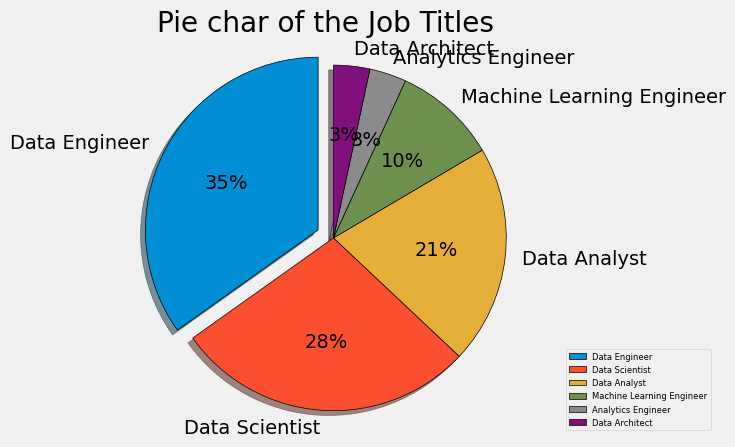

In [14]:
'''
Pie chart for job title
'''
plt.style.use('fivethirtyeight')
labels=pie_filt.index
sizes=pie_filt.values

explode=[0.1,0,0,0,0,0]
plt.pie(sizes,labels=labels,startangle=90,explode=explode,wedgeprops={'edgecolor':'black'},autopct='%0.f%%',shadow=True)
plt.legend(loc='center left',prop={'size':6},bbox_to_anchor=(1.05,0.1))
plt.axis('equal')
plt.subplots_adjust(right=0.75)
plt.title('Pie char of the Job Titles')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


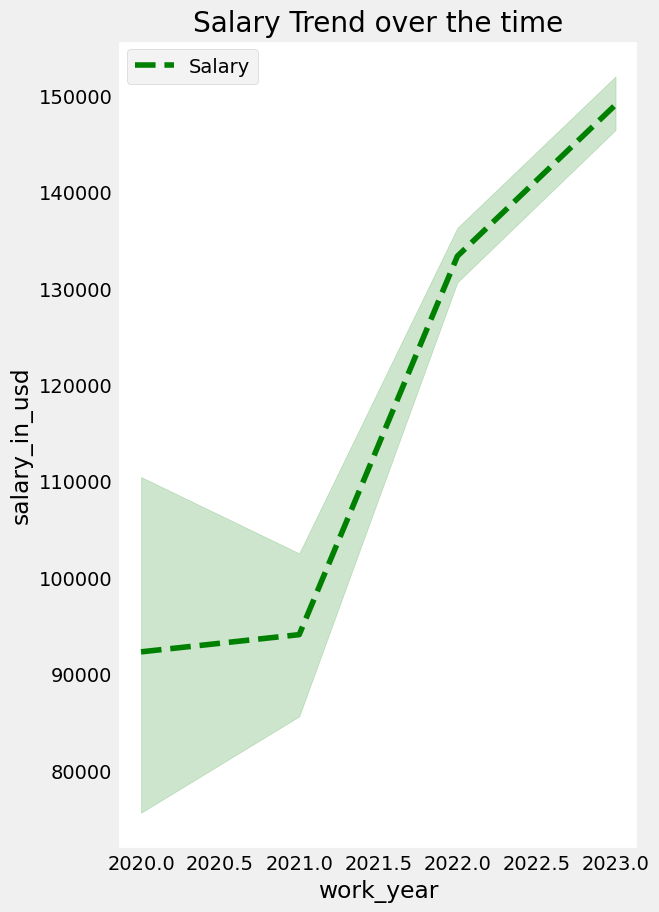

In [15]:
plt.figure(figsize=(6,10))
salary_trend=df[['salary_in_usd','work_year']].sort_values(by='work_year')
st=sns.lineplot(data=salary_trend,y='salary_in_usd',x='work_year',linestyle='--',color='green',markersize=10)
plt.title('Salary Trend over the time')
st.set_facecolor('white')
st.grid(False)
plt.legend(['Salary'],loc='upper left')
plt.show()
